# Training the Model (Decision Tree)

In [15]:
import glob
import librosa
import librosa.display
import numpy as np
import _pickle as pickle
import pandas as pd

def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


def parse_audio_files(path):
    features, labels = np.empty((0, 193)), np.empty(0)
    labels = []
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[-1].split(".")[0])
    return np.array(features), np.array(labels)



tr_features, tr_labels = parse_audio_files('D:/Project_TH_2/Data_set/train/*.wav')

tr_features = np.array(tr_features, dtype=pd.Series)
tr_labels = np.array(tr_labels, dtype=pd.Series)

X=tr_features.astype(int)
y=tr_labels.astype(str)

#class_weight="balanced",criterion='entropy', max_depth=10, min_samples_split=20, min_samples_leaf=10
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

filename = 'D:/Project_TH_2/Model/Model_Decision_tree/clf_Model_protocol_tree.sav'

pickle.dump(clf, open(filename, 'wb'), protocol=2)

print('Model Saved..')
print('Score:', clf.score(X=tr_features.astype(int), y=tr_labels.astype(str)))

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=539
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=809
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_fat_angry.wav
D:/Project_TH_2/Data_set/train\OAF_fat_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=552
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=628
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_fat_fear.wav
D:/Project_TH_2/Data_set/train\OAF_fat_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=676
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=684
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_fat_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_fat_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=858
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_fat_sad.wav
D:/Project_TH_2/Data_set/train\OAF_fit_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=725
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=546
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_fit_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_fit_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=641
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=642
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_fit_happy.wav
D:/Project_TH_2/Data_set/train\OAF_fit_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=644
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=805
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_fit_ps.wav
D:/Project_TH_2/Data_set/train\OAF_fit_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=549
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=845
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_five_angry.wav
D:/Project_TH_2/Data_set/train\OAF_five_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=590
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=721
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_five_fear.wav
D:/Project_TH_2/Data_set/train\OAF_five_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=668
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=764
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_five_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_five_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=878
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=529
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_five_sad.wav
D:/Project_TH_2/Data_set/train\OAF_food_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=756
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=522
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_food_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_food_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=719
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=662
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_food_happy.wav
D:/Project_TH_2/Data_set/train\OAF_food_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=729
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_food_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=832
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_food_sad.wav
D:/Project_TH_2/Data_set/train\OAF_gap_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=815
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=582
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gap_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_gap_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=610
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=679
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gap_happy.wav
D:/Project_TH_2/Data_set/train\OAF_gap_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=683
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gap_ps.wav
D:/Project_TH_2/Data_set/train\OAF_gap_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=569
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gas_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=830
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=537
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gas_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_gas_fear.wav
D:/Project_TH_2/Data_set/train\OAF_gas_happy.wav
D:/Project_TH_2/Data_set/train\OAF_gas_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=718
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=828
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gas_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=932
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=583
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gas_sad.wav
D:/Project_TH_2/Data_set/train\OAF_gaze_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=908
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=580
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gaze_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_gaze_fear.wav
D:/Project_TH_2/Data_set/train\OAF_gaze_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=763
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=736
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gaze_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_gaze_ps.wav
D:/Project_TH_2/Data_set/train\OAF_gaze_sad.wav
D:/Project_TH_2/Data_set/train\OAF_germ_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1022
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=511
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=886
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_germ_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_germ_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=571
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_germ_happy.wav
D:/Project_TH_2/Data_set/train\OAF_germ_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=722
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=741
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_germ_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=863
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=567
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_germ_sad.wav
D:/Project_TH_2/Data_set/train\OAF_get_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=752
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=895
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=448
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_get_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_get_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=650
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=654
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_get_happy.wav
D:/Project_TH_2/Data_set/train\OAF_get_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_get_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=827
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=543
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_get_sad.wav
D:/Project_TH_2/Data_set/train\OAF_gin_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=829
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gin_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_gin_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=663
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=720
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gin_happy.wav
D:/Project_TH_2/Data_set/train\OAF_gin_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=709
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gin_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=934
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=524
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gin_sad.wav
D:/Project_TH_2/Data_set/train\OAF_goal_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=834
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goal_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_goal_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=680
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=671
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goal_happy.wav
D:/Project_TH_2/Data_set/train\OAF_goal_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=670
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goal_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=907
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=515
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goal_sad.wav
D:/Project_TH_2/Data_set/train\OAF_good_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=839
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1021
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_good_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_good_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=658
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_good_happy.wav
D:/Project_TH_2/Data_set/train\OAF_good_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=621
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_good_ps.wav
D:/Project_TH_2/Data_set/train\OAF_good_sad.wav
D:/Project_TH_2/Data_set/train\OAF_goose_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=528
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=806
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goose_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_goose_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=551
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=629
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goose_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=775
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goose_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=733
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=867
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_goose_ps.wav
D:/Project_TH_2/Data_set/train\OAF_goose_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=531
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gun_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=854
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gun_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_gun_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=678
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gun_happy.wav
D:/Project_TH_2/Data_set/train\OAF_gun_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_gun_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=864
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=585
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_gun_sad.wav
D:/Project_TH_2/Data_set/train\OAF_half_angry.wav
D:/Project_TH_2/Data_set/train\OAF_half_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_half_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=743
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_half_happy.wav
D:/Project_TH_2/Data_set/train\OAF_half_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_half_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=874
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=518
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_half_sad.wav
D:/Project_TH_2/Data_set/train\OAF_hall_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=791
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=959
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=480
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hall_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_hall_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=702
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hall_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hall_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=728
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hall_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=836
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hall_sad.wav
D:/Project_TH_2/Data_set/train\OAF_hash_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=631
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hash_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_hash_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=696
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=744
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hash_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hash_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=664
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hash_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=813
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1023
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=512
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hash_sad.wav
D:/Project_TH_2/Data_set/train\OAF_hate_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=823
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=516
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hate_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_hate_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=613
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=616
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hate_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hate_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=685
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hate_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=810
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=570
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hate_sad.wav
D:/Project_TH_2/Data_set/train\OAF_have_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=849
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_have_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_have_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=717
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=661
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_have_happy.wav
D:/Project_TH_2/Data_set/train\OAF_have_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_have_ps.wav
D:/Project_TH_2/Data_set/train\OAF_have_sad.wav
D:/Project_TH_2/Data_set/train\OAF_haze_angry.wav
D:/Project_TH_2/Data_set/train\OAF_haze_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_haze_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=700
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=692
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_haze_happy.wav
D:/Project_TH_2/Data_set/train\OAF_haze_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=735
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_haze_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=909
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=520
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_haze_sad.wav
D:/Project_TH_2/Data_set/train\OAF_hire_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=716
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=573
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hire_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_hire_fear.wav
D:/Project_TH_2/Data_set/train\OAF_hire_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hire_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=673
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hire_ps.wav
D:/Project_TH_2/Data_set/train\OAF_hire_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=935
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=468
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=817
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hit_angry.wav
D:/Project_TH_2/Data_set/train\OAF_hit_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_hit_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=550
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=688
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hit_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hit_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=639
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hit_ps.wav
D:/Project_TH_2/Data_set/train\OAF_hit_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=576
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=818
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hole_angry.wav
D:/Project_TH_2/Data_set/train\OAF_hole_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=997
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=499
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hole_fear.wav
D:/Project_TH_2/Data_set/train\OAF_hole_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hole_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_hole_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=755
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=898
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hole_sad.wav
D:/Project_TH_2/Data_set/train\OAF_home_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=996
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=498
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=816
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_home_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_home_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=538
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_home_happy.wav
D:/Project_TH_2/Data_set/train\OAF_home_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_home_ps.wav
D:/Project_TH_2/Data_set/train\OAF_home_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=774
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hurl_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=782
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=960
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hurl_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_hurl_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=651
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=681
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hurl_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hurl_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=634
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=852
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hurl_ps.wav
D:/Project_TH_2/Data_set/train\OAF_hurl_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=533
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=880
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hush_angry.wav
D:/Project_TH_2/Data_set/train\OAF_hush_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=532
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hush_fear.wav
D:/Project_TH_2/Data_set/train\OAF_hush_happy.wav
D:/Project_TH_2/Data_set/train\OAF_hush_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=698
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hush_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=943
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1015
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=508
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_hush_sad.wav
D:/Project_TH_2/Data_set/train\OAF_jail_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=876
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=596
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_jail_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_jail_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=617
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=748
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_jail_happy.wav
D:/Project_TH_2/Data_set/train\OAF_jail_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_jail_ps.wav
D:/Project_TH_2/Data_set/train\OAF_jail_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=697
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=847
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_jar_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=835
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_jar_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_jar_fear.wav
D:/Project_TH_2/Data_set/train\OAF_jar_happy.wav
D:/Project_TH_2/Data_set/train\OAF_jar_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=674
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=866
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_jar_ps.wav
D:/Project_TH_2/Data_set/train\OAF_jar_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=556
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_join_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=814
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=523
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_join_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_join_fear.wav
D:/Project_TH_2/Data_set/train\OAF_join_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=772
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_join_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_join_ps.wav
D:/Project_TH_2/Data_set/train\OAF_join_sad.wav
D:/Project_TH_2/Data_set/train\OAF_judge_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=595
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_judge_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_judge_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=981
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=491
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=727
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_judge_happy.wav
D:/Project_TH_2/Data_set/train\OAF_judge_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=734
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=794
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_judge_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=904
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=534
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_judge_sad.wav
D:/Project_TH_2/Data_set/train\OAF_jug_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=803
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=630
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_jug_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_jug_fear.wav
D:/Project_TH_2/Data_set/train\OAF_jug_happy.wav
D:/Project_TH_2/Data_set/train\OAF_jug_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=769
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_jug_ps.wav
D:/Project_TH_2/Data_set/train\OAF_jug_sad.wav
D:/Project_TH_2/Data_set/train\OAF_juice_angry.wav
D:/Project_TH_2/Data_set/train\OAF_juice_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=564
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_juice_fear.wav
D:/Project_TH_2/Data_set/train\OAF_juice_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=740
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=765
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_juice_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_juice_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=875
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_juice_sad.wav
D:/Project_TH_2/Data_set/train\OAF_keen_angry.wav
D:/Project_TH_2/Data_set/train\OAF_keen_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_keen_fear.wav
D:/Project_TH_2/Data_set/train\OAF_keen_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=739
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=665
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keen_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_keen_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=859
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=536
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keen_sad.wav
D:/Project_TH_2/Data_set/train\OAF_keep_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=911
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=578
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keep_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_keep_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=657
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=666
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keep_happy.wav
D:/Project_TH_2/Data_set/train\OAF_keep_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=732
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keep_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=955
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=993
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=497
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keep_sad.wav
D:/Project_TH_2/Data_set/train\OAF_keg_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=837
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=563
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keg_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_keg_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=633
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_keg_happy.wav
D:/Project_TH_2/Data_set/train\OAF_keg_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_keg_ps.wav
D:/Project_TH_2/Data_set/train\OAF_keg_sad.wav
D:/Project_TH_2/Data_set/train\OAF_kick_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=783
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=983
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=492
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kick_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_kick_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=757
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kick_happy.wav
D:/Project_TH_2/Data_set/train\OAF_kick_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_kick_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=901
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=517
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kick_sad.wav
D:/Project_TH_2/Data_set/train\OAF_kill_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=799
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kill_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_kill_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=773
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=714
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kill_happy.wav
D:/Project_TH_2/Data_set/train\OAF_kill_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=770
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kill_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=894
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kill_sad.wav
D:/Project_TH_2/Data_set/train\OAF_king_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=780
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=555
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_king_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_king_fear.wav
D:/Project_TH_2/Data_set/train\OAF_king_happy.wav
D:/Project_TH_2/Data_set/train\OAF_king_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=660
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_king_ps.wav
D:/Project_TH_2/Data_set/train\OAF_king_sad.wav
D:/Project_TH_2/Data_set/train\OAF_kite_angry.wav
D:/Project_TH_2/Data_set/train\OAF_kite_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_kite_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1007
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=504
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=643
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kite_happy.wav
D:/Project_TH_2/Data_set/train\OAF_kite_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_kite_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=924
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_kite_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=622
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_knock_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=842
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_knock_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_knock_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=682
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=669
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_knock_happy.wav
D:/Project_TH_2/Data_set/train\OAF_knock_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=712
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_knock_ps.wav
D:/Project_TH_2/Data_set/train\OAF_knock_sad.wav
D:/Project_TH_2/Data_set/train\OAF_late_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=577
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_late_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_late_fear.wav
D:/Project_TH_2/Data_set/train\OAF_late_happy.wav
D:/Project_TH_2/Data_set/train\OAF_late_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_late_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=675
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=824
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_late_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=572
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=784
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_laud_angry.wav
D:/Project_TH_2/Data_set/train\OAF_laud_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=527
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=646
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_laud_fear.wav
D:/Project_TH_2/Data_set/train\OAF_laud_happy.wav
D:/Project_TH_2/Data_set/train\OAF_laud_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_laud_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=825
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=560
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_laud_sad.wav
D:/Project_TH_2/Data_set/train\OAF_lean_angry.wav
D:/Project_TH_2/Data_set/train\OAF_lean_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_lean_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=513
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lean_happy.wav
D:/Project_TH_2/Data_set/train\OAF_lean_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=713
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lean_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=850
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lean_sad.wav
D:/Project_TH_2/Data_set/train\OAF_learn_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=795
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=586
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_learn_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_learn_fear.wav
D:/Project_TH_2/Data_set/train\OAF_learn_happy.wav
D:/Project_TH_2/Data_set/train\OAF_learn_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_learn_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=838
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_learn_sad.wav
D:/Project_TH_2/Data_set/train\OAF_lease_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=796
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lease_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_lease_fear.wav
D:/Project_TH_2/Data_set/train\OAF_lease_happy.wav
D:/Project_TH_2/Data_set/train\OAF_lease_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=749
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lease_ps.wav
D:/Project_TH_2/Data_set/train\OAF_lease_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=975
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=488
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=715
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lid_angry.wav
D:/Project_TH_2/Data_set/train\OAF_lid_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_lid_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=694
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lid_happy.wav
D:/Project_TH_2/Data_set/train\OAF_lid_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=691
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lid_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=871
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lid_sad.wav
D:/Project_TH_2/Data_set/train\OAF_life_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=840
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=624
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_life_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_life_fear.wav
D:/Project_TH_2/Data_set/train\OAF_life_happy.wav
D:/Project_TH_2/Data_set/train\OAF_life_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=771
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_life_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=884
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=559
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_life_sad.wav
D:/Project_TH_2/Data_set/train\OAF_limb_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=855
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1010
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=505
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_limb_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_limb_fear.wav
D:/Project_TH_2/Data_set/train\OAF_limb_happy.wav
D:/Project_TH_2/Data_set/train\OAF_limb_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_limb_ps.wav
D:/Project_TH_2/Data_set/train\OAF_limb_sad.wav
D:/Project_TH_2/Data_set/train\OAF_live_angry.wav
D:/Project_TH_2/Data_set/train\OAF_live_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_live_fear.wav
D:/Project_TH_2/Data_set/train\OAF_live_happy.wav
D:/Project_TH_2/Data_set/train\OAF_live_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_live_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=695
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_live_sad.wav
D:/Project_TH_2/Data_set/train\OAF_loaf_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=579
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=900
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_loaf_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_loaf_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=589
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_loaf_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=758
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=708
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_loaf_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_loaf_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=921
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_loaf_sad.wav
D:/Project_TH_2/Data_set/train\OAF_long_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=778
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_long_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_long_fear.wav
D:/Project_TH_2/Data_set/train\OAF_long_happy.wav
D:/Project_TH_2/Data_set/train\OAF_long_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_long_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=906
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=587
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_long_sad.wav
D:/Project_TH_2/Data_set/train\OAF_lore_angry.wav
D:/Project_TH_2/Data_set/train\OAF_lore_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_lore_fear.wav
D:/Project_TH_2/Data_set/train\OAF_lore_happy.wav
D:/Project_TH_2/Data_set/train\OAF_lore_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=656
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lore_ps.wav
D:/Project_TH_2/Data_set/train\OAF_lore_sad.wav
D:/Project_TH_2/Data_set/train\OAF_lose_angry.wav
D:/Project_TH_2/Data_set/train\OAF_lose_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_lose_fear.wav
D:/Project_TH_2/Data_set/train\OAF_lose_happy.wav
D:/Project_TH_2/Data_set/train\OAF_lose_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=826
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lose_ps.wav
D:/Project_TH_2/Data_set/train\OAF_lose_sad.wav
D:/Project_TH_2/Data_set/train\OAF_lot_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=819
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lot_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_lot_fear.wav
D:/Project_TH_2/Data_set/train\OAF_lot_happy.wav
D:/Project_TH_2/Data_set/train\OAF_lot_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_lot_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=885
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_lot_sad.wav
D:/Project_TH_2/Data_set/train\OAF_love_angry.wav
D:/Project_TH_2/Data_set/train\OAF_love_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_love_fear.wav
D:/Project_TH_2/Data_set/train\OAF_love_happy.wav
D:/Project_TH_2/Data_set/train\OAF_love_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=667
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=888
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_love_ps.wav
D:/Project_TH_2/Data_set/train\OAF_love_sad.wav
D:/Project_TH_2/Data_set/train\OAF_luck_angry.wav
D:/Project_TH_2/Data_set/train\OAF_luck_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=766
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_luck_fear.wav
D:/Project_TH_2/Data_set/train\OAF_luck_happy.wav
D:/Project_TH_2/Data_set/train\OAF_luck_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_luck_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=760
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=801
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_luck_sad.wav
D:/Project_TH_2/Data_set/train\OAF_make_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=862
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_make_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_make_fear.wav
D:/Project_TH_2/Data_set/train\OAF_make_happy.wav
D:/Project_TH_2/Data_set/train\OAF_make_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_make_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=865
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=581
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_make_sad.wav
D:/Project_TH_2/Data_set/train\OAF_match_angry.wav
D:/Project_TH_2/Data_set/train\OAF_match_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_match_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=566
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_match_happy.wav
D:/Project_TH_2/Data_set/train\OAF_match_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=612
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_match_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=980
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_match_sad.wav
D:/Project_TH_2/Data_set/train\OAF_merge_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=846
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_merge_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_merge_fear.wav
D:/Project_TH_2/Data_set/train\OAF_merge_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=710
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_merge_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_merge_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=902
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=584
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_merge_sad.wav
D:/Project_TH_2/Data_set/train\OAF_mess_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=860
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mess_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_mess_fear.wav
D:/Project_TH_2/Data_set/train\OAF_mess_happy.wav
D:/Project_TH_2/Data_set/train\OAF_mess_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_mess_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=897
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mess_sad.wav
D:/Project_TH_2/Data_set/train\OAF_met_angry.wav
D:/Project_TH_2/Data_set/train\OAF_met_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_met_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=649
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=689
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_met_happy.wav
D:/Project_TH_2/Data_set/train\OAF_met_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=762
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_met_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=843
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_met_sad.wav
D:/Project_TH_2/Data_set/train\OAF_mill_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=785
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mill_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_mill_fear.wav
D:/Project_TH_2/Data_set/train\OAF_mill_happy.wav
D:/Project_TH_2/Data_set/train\OAF_mill_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_mill_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=945
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mill_sad.wav
D:/Project_TH_2/Data_set/train\OAF_mob_angry.wav
D:/Project_TH_2/Data_set/train\OAF_mob_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_mob_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=541
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mob_happy.wav
D:/Project_TH_2/Data_set/train\OAF_mob_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_mob_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=853
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1017
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=509
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mob_sad.wav
D:/Project_TH_2/Data_set/train\OAF_mode_angry.wav
D:/Project_TH_2/Data_set/train\OAF_mode_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_mode_fear.wav
D:/Project_TH_2/Data_set/train\OAF_mode_happy.wav
D:/Project_TH_2/Data_set/train\OAF_mode_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_mode_ps.wav
D:/Project_TH_2/Data_set/train\OAF_mode_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=540
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mood_angry.wav
D:/Project_TH_2/Data_set/train\OAF_mood_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=956
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=478
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mood_fear.wav
D:/Project_TH_2/Data_set/train\OAF_mood_happy.wav
D:/Project_TH_2/Data_set/train\OAF_mood_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_mood_ps.wav
D:/Project_TH_2/Data_set/train\OAF_mood_sad.wav
D:/Project_TH_2/Data_set/train\OAF_moon_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=804
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=530
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_moon_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_moon_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=640
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_moon_happy.wav
D:/Project_TH_2/Data_set/train\OAF_moon_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=737
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_moon_ps.wav
D:/Project_TH_2/Data_set/train\OAF_moon_sad.wav
D:/Project_TH_2/Data_set/train\OAF_mop_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=958
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=479
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=742
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mop_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_mop_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=544
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mop_happy.wav
D:/Project_TH_2/Data_set/train\OAF_mop_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=620
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mop_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=868
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mop_sad.wav
D:/Project_TH_2/Data_set/train\OAF_mouse_angry.wav
D:/Project_TH_2/Data_set/train\OAF_mouse_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_mouse_fear.wav
D:/Project_TH_2/Data_set/train\OAF_mouse_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=726
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mouse_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_mouse_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=916
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_mouse_sad.wav
D:/Project_TH_2/Data_set/train\OAF_nag_angry.wav
D:/Project_TH_2/Data_set/train\OAF_nag_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_nag_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=699
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_nag_happy.wav
D:/Project_TH_2/Data_set/train\OAF_nag_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_nag_ps.wav
D:/Project_TH_2/Data_set/train\OAF_nag_sad.wav
D:/Project_TH_2/Data_set/train\OAF_name_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=821
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_name_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_name_fear.wav
D:/Project_TH_2/Data_set/train\OAF_name_happy.wav
D:/Project_TH_2/Data_set/train\OAF_name_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=636
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_name_ps.wav
D:/Project_TH_2/Data_set/train\OAF_name_sad.wav
D:/Project_TH_2/Data_set/train\OAF_near_angry.wav
D:/Project_TH_2/Data_set/train\OAF_near_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=969
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=485
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_near_fear.wav
D:/Project_TH_2/Data_set/train\OAF_near_happy.wav
D:/Project_TH_2/Data_set/train\OAF_near_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_near_ps.wav
D:/Project_TH_2/Data_set/train\OAF_near_sad.wav
D:/Project_TH_2/Data_set/train\OAF_neat_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=822
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_neat_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_neat_fear.wav
D:/Project_TH_2/Data_set/train\OAF_neat_happy.wav
D:/Project_TH_2/Data_set/train\OAF_neat_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_neat_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=929
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_neat_sad.wav
D:/Project_TH_2/Data_set/train\OAF_nice_angry.wav
D:/Project_TH_2/Data_set/train\OAF_nice_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_nice_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=611
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_nice_happy.wav
D:/Project_TH_2/Data_set/train\OAF_nice_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_nice_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=930
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=984
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_nice_sad.wav
D:/Project_TH_2/Data_set/train\OAF_note_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=798
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1016
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_note_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_note_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=704
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_note_happy.wav
D:/Project_TH_2/Data_set/train\OAF_note_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=703
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=861
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_note_ps.wav
D:/Project_TH_2/Data_set/train\OAF_note_sad.wav
D:/Project_TH_2/Data_set/train\OAF_numb_angry.wav
D:/Project_TH_2/Data_set/train\OAF_numb_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_numb_fear.wav
D:/Project_TH_2/Data_set/train\OAF_numb_happy.wav
D:/Project_TH_2/Data_set/train\OAF_numb_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_numb_ps.wav
D:/Project_TH_2/Data_set/train\OAF_numb_sad.wav
D:/Project_TH_2/Data_set/train\OAF_pad_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=738
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=519
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pad_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pad_fear.wav
D:/Project_TH_2/Data_set/train\OAF_pad_happy.wav
D:/Project_TH_2/Data_set/train\OAF_pad_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_pad_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=844
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pad_sad.wav
D:/Project_TH_2/Data_set/train\OAF_page_angry.wav
D:/Project_TH_2/Data_set/train\OAF_page_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_page_fear.wav
D:/Project_TH_2/Data_set/train\OAF_page_happy.wav
D:/Project_TH_2/Data_set/train\OAF_page_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_page_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1006
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_page_sad.wav
D:/Project_TH_2/Data_set/train\OAF_pain_angry.wav
D:/Project_TH_2/Data_set/train\OAF_pain_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pain_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=599
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=724
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pain_happy.wav
D:/Project_TH_2/Data_set/train\OAF_pain_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=701
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pain_ps.wav
D:/Project_TH_2/Data_set/train\OAF_pain_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=562
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pass_angry.wav
D:/Project_TH_2/Data_set/train\OAF_pass_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pass_fear.wav
D:/Project_TH_2/Data_set/train\OAF_pass_happy.wav
D:/Project_TH_2/Data_set/train\OAF_pass_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_pass_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=793
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=917
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pass_sad.wav
D:/Project_TH_2/Data_set/train\OAF_pearl_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=841
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pearl_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pearl_fear.wav
D:/Project_TH_2/Data_set/train\OAF_pearl_happy.wav
D:/Project_TH_2/Data_set/train\OAF_pearl_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_pearl_ps.wav
D:/Project_TH_2/Data_set/train\OAF_pearl_sad.wav
D:/Project_TH_2/Data_set/train\OAF_peg_angry.wav
D:/Project_TH_2/Data_set/train\OAF_peg_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=521
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=746
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_peg_fear.wav
D:/Project_TH_2/Data_set/train\OAF_peg_happy.wav
D:/Project_TH_2/Data_set/train\OAF_peg_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_peg_ps.wav
D:/Project_TH_2/Data_set/train\OAF_peg_sad.wav
D:/Project_TH_2/Data_set/train\OAF_perch_angry.wav
D:/Project_TH_2/Data_set/train\OAF_perch_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_perch_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=545
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_perch_happy.wav
D:/Project_TH_2/Data_set/train\OAF_perch_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_perch_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=967
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_perch_sad.wav
D:/Project_TH_2/Data_set/train\OAF_phone_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=792
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_phone_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_phone_fear.wav
D:/Project_TH_2/Data_set/train\OAF_phone_happy.wav
D:/Project_TH_2/Data_set/train\OAF_phone_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_phone_ps.wav
D:/Project_TH_2/Data_set/train\OAF_phone_sad.wav
D:/Project_TH_2/Data_set/train\OAF_pick_angry.wav
D:/Project_TH_2/Data_set/train\OAF_pick_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pick_fear.wav
D:/Project_TH_2/Data_set/train\OAF_pick_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=653
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pick_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_pick_ps.wav
D:/Project_TH_2/Data_set/train\OAF_pick_sad.wav
D:/Project_TH_2/Data_set/train\OAF_pike_angry.wav
D:/Project_TH_2/Data_set/train\OAF_pike_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pike_fear.wav
D:/Project_TH_2/Data_set/train\OAF_pike_happy.wav
D:/Project_TH_2/Data_set/train\OAF_pike_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=632
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pike_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=882
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pike_sad.wav
D:/Project_TH_2/Data_set/train\OAF_pole_angry.wav
D:/Project_TH_2/Data_set/train\OAF_pole_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pole_fear.wav
D:/Project_TH_2/Data_set/train\OAF_pole_happy.wav
D:/Project_TH_2/Data_set/train\OAF_pole_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_pole_ps.wav
D:/Project_TH_2/Data_set/train\OAF_pole_sad.wav
D:/Project_TH_2/Data_set/train\OAF_pool_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=949
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=475
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_pool_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_pool_fear.wav
D:/Project_TH_2/Data_set/train\OAF_pool_happy.wav
D:/Project_TH_2/Data_set/train\OAF_pool_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_pool_ps.wav
D:/Project_TH_2/Data_set/train\OAF_pool_sad.wav
D:/Project_TH_2/Data_set/train\OAF_puff_angry.wav
D:/Project_TH_2/Data_set/train\OAF_puff_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_puff_fear.wav
D:/Project_TH_2/Data_set/train\OAF_puff_happy.wav
D:/Project_TH_2/Data_set/train\OAF_puff_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_puff_ps.wav
D:/Project_TH_2/Data_set/train\OAF_puff_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=553
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rag_angry.wav
D:/Project_TH_2/Data_set/train\OAF_rag_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=542
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rag_fear.wav
D:/Project_TH_2/Data_set/train\OAF_rag_happy.wav
D:/Project_TH_2/Data_set/train\OAF_rag_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_rag_ps.wav
D:/Project_TH_2/Data_set/train\OAF_rag_sad.wav
D:/Project_TH_2/Data_set/train\OAF_raid_angry.wav
D:/Project_TH_2/Data_set/train\OAF_raid_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_raid_fear.wav
D:/Project_TH_2/Data_set/train\OAF_raid_happy.wav
D:/Project_TH_2/Data_set/train\OAF_raid_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=730
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_raid_ps.wav
D:/Project_TH_2/Data_set/train\OAF_raid_sad.wav
D:/Project_TH_2/Data_set/train\OAF_rain_angry.wav
D:/Project_TH_2/Data_set/train\OAF_rain_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=557
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=723
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rain_fear.wav
D:/Project_TH_2/Data_set/train\OAF_rain_happy.wav
D:/Project_TH_2/Data_set/train\OAF_rain_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_rain_ps.wav
D:/Project_TH_2/Data_set/train\OAF_rain_sad.wav
D:/Project_TH_2/Data_set/train\OAF_raise_angry.wav
D:/Project_TH_2/Data_set/train\OAF_raise_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_raise_fear.wav
D:/Project_TH_2/Data_set/train\OAF_raise_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=802
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_raise_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_raise_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1004
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_raise_sad.wav
D:/Project_TH_2/Data_set/train\OAF_rat_angry.wav
D:/Project_TH_2/Data_set/train\OAF_rat_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_rat_fear.wav
D:/Project_TH_2/Data_set/train\OAF_rat_happy.wav
D:/Project_TH_2/Data_set/train\OAF_rat_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=635
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rat_ps.wav
D:/Project_TH_2/Data_set/train\OAF_rat_sad.wav
D:/Project_TH_2/Data_set/train\OAF_reach_angry.wav
D:/Project_TH_2/Data_set/train\OAF_reach_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=588
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_reach_fear.wav
D:/Project_TH_2/Data_set/train\OAF_reach_happy.wav
D:/Project_TH_2/Data_set/train\OAF_reach_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=753
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_reach_ps.wav
D:/Project_TH_2/Data_set/train\OAF_reach_sad.wav
D:/Project_TH_2/Data_set/train\OAF_read_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=750
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_read_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_read_fear.wav
D:/Project_TH_2/Data_set/train\OAF_read_happy.wav
D:/Project_TH_2/Data_set/train\OAF_read_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_read_ps.wav
D:/Project_TH_2/Data_set/train\OAF_read_sad.wav
D:/Project_TH_2/Data_set/train\OAF_red_angry.wav
D:/Project_TH_2/Data_set/train\OAF_red_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1002
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=501
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_red_fear.wav
D:/Project_TH_2/Data_set/train\OAF_red_happy.wav
D:/Project_TH_2/Data_set/train\OAF_red_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_red_ps.wav
D:/Project_TH_2/Data_set/train\OAF_red_sad.wav
D:/Project_TH_2/Data_set/train\OAF_ring_angry.wav
D:/Project_TH_2/Data_set/train\OAF_ring_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_ring_fear.wav
D:/Project_TH_2/Data_set/train\OAF_ring_happy.wav
D:/Project_TH_2/Data_set/train\OAF_ring_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_ring_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=870
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_ring_sad.wav
D:/Project_TH_2/Data_set/train\OAF_ripe_angry.wav
D:/Project_TH_2/Data_set/train\OAF_ripe_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_ripe_fear.wav
D:/Project_TH_2/Data_set/train\OAF_ripe_happy.wav
D:/Project_TH_2/Data_set/train\OAF_ripe_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=705
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_ripe_ps.wav
D:/Project_TH_2/Data_set/train\OAF_ripe_sad.wav
D:/Project_TH_2/Data_set/train\OAF_road_angry.wav
D:/Project_TH_2/Data_set/train\OAF_road_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_road_fear.wav
D:/Project_TH_2/Data_set/train\OAF_road_happy.wav
D:/Project_TH_2/Data_set/train\OAF_road_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_road_ps.wav
D:/Project_TH_2/Data_set/train\OAF_road_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=811
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_room_angry.wav
D:/Project_TH_2/Data_set/train\OAF_room_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=547
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_room_fear.wav
D:/Project_TH_2/Data_set/train\OAF_room_happy.wav
D:/Project_TH_2/Data_set/train\OAF_room_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_room_ps.wav
D:/Project_TH_2/Data_set/train\OAF_room_sad.wav
D:/Project_TH_2/Data_set/train\OAF_rose_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=919
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rose_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_rose_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=761
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rose_happy.wav
D:/Project_TH_2/Data_set/train\OAF_rose_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=751
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=914
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rose_ps.wav
D:/Project_TH_2/Data_set/train\OAF_rose_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=946
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=473
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rot_angry.wav
D:/Project_TH_2/Data_set/train\OAF_rot_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_rot_fear.wav
D:/Project_TH_2/Data_set/train\OAF_rot_happy.wav
D:/Project_TH_2/Data_set/train\OAF_rot_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=627
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rot_ps.wav
D:/Project_TH_2/Data_set/train\OAF_rot_sad.wav
D:/Project_TH_2/Data_set/train\OAF_rough_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=593
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=883
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rough_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_rough_fear.wav
D:/Project_TH_2/Data_set/train\OAF_rough_happy.wav
D:/Project_TH_2/Data_set/train\OAF_rough_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=767
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rough_ps.wav
D:/Project_TH_2/Data_set/train\OAF_rough_sad.wav
D:/Project_TH_2/Data_set/train\OAF_rush_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=797
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_rush_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_rush_fear.wav
D:/Project_TH_2/Data_set/train\OAF_rush_happy.wav
D:/Project_TH_2/Data_set/train\OAF_rush_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_rush_ps.wav
D:/Project_TH_2/Data_set/train\OAF_rush_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1011
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=506
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=768
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_said_angry.wav
D:/Project_TH_2/Data_set/train\OAF_said_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_said_fear.wav
D:/Project_TH_2/Data_set/train\OAF_said_happy.wav
D:/Project_TH_2/Data_set/train\OAF_said_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_said_ps.wav
D:/Project_TH_2/Data_set/train\OAF_said_sad.wav
D:/Project_TH_2/Data_set/train\OAF_sail_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=575
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sail_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_sail_fear.wav
D:/Project_TH_2/Data_set/train\OAF_sail_happy.wav
D:/Project_TH_2/Data_set/train\OAF_sail_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=711
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sail_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=910
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sail_sad.wav
D:/Project_TH_2/Data_set/train\OAF_search_angry.wav
D:/Project_TH_2/Data_set/train\OAF_search_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_search_fear.wav
D:/Project_TH_2/Data_set/train\OAF_search_happy.wav
D:/Project_TH_2/Data_set/train\OAF_search_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=789
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_search_ps.wav
D:/Project_TH_2/Data_set/train\OAF_search_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=607
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_seize_angry.wav
D:/Project_TH_2/Data_set/train\OAF_seize_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=597
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=759
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_seize_fear.wav
D:/Project_TH_2/Data_set/train\OAF_seize_happy.wav
D:/Project_TH_2/Data_set/train\OAF_seize_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_seize_ps.wav
D:/Project_TH_2/Data_set/train\OAF_seize_sad.wav
D:/Project_TH_2/Data_set/train\OAF_sell_angry.wav
D:/Project_TH_2/Data_set/train\OAF_sell_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_sell_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=686
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sell_happy.wav
D:/Project_TH_2/Data_set/train\OAF_sell_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=655
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sell_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=954
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=514
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sell_sad.wav
D:/Project_TH_2/Data_set/train\OAF_shack_angry.wav
D:/Project_TH_2/Data_set/train\OAF_shack_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_shack_fear.wav
D:/Project_TH_2/Data_set/train\OAF_shack_happy.wav
D:/Project_TH_2/Data_set/train\OAF_shack_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=652
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_shack_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=857
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_shack_sad.wav
D:/Project_TH_2/Data_set/train\OAF_shall_angry.wav
D:/Project_TH_2/Data_set/train\OAF_shall_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_shall_fear.wav
D:/Project_TH_2/Data_set/train\OAF_shall_happy.wav
D:/Project_TH_2/Data_set/train\OAF_shall_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_shall_ps.wav
D:/Project_TH_2/Data_set/train\OAF_shall_sad.wav
D:/Project_TH_2/Data_set/train\OAF_shawl_angry.wav
D:/Project_TH_2/Data_set/train\OAF_shawl_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_shawl_fear.wav
D:/Project_TH_2/Data_set/train\OAF_shawl_happy.wav
D:/Project_TH_2/Data_set/train\OAF_shawl_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_shawl_ps.wav
D:/Project_TH_2/Data_set/train\OAF_shawl_sad.wav
D:/Project_TH_2/Data_set/train\OAF_sheep_angry.wav
D:/Project_TH_2/Data_set/train\OAF_sheep_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_sheep_fear.wav
D:/Project_TH_2/Data_set/train\OAF_sheep_happy.wav
D:/Project_TH_2/Data_set/train\OAF_s

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=447
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_shirt_happy.wav
D:/Project_TH_2/Data_set/train\OAF_shirt_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_shirt_ps.wav
D:/Project_TH_2/Data_set/train\OAF_shirt_sad.wav
D:/Project_TH_2/Data_set/train\OAF_should_angry.wav
D:/Project_TH_2/Data_set/train\OAF_should_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_should_fear.wav
D:/Project_TH_2/Data_set/train\OAF_should_happy.wav
D:/Project_TH_2/Data_set/train\OAF_should_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=707
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_should_ps.wav
D:/Project_TH_2/Data_set/train\OAF_should_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=964
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=482
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_shout_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=856
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=565
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_shout_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_shout_fear.wav
D:/Project_TH_2/Data_set/train\OAF_shout_happy.wav
D:/Project_TH_2/Data_set/train\OAF_shout_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_shout_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=926
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_shout_sad.wav
D:/Project_TH_2/Data_set/train\OAF_size_angry.wav
D:/Project_TH_2/Data_set/train\OAF_size_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=609
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=745
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_size_fear.wav
D:/Project_TH_2/Data_set/train\OAF_size_happy.wav
D:/Project_TH_2/Data_set/train\OAF_size_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_size_ps.wav
D:/Project_TH_2/Data_set/train\OAF_size_sad.wav
D:/Project_TH_2/Data_set/train\OAF_soap_angry.wav
D:/Project_TH_2/Data_set/train\OAF_soap_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_soap_fear.wav
D:/Project_TH_2/Data_set/train\OAF_soap_happy.wav
D:/Project_TH_2/Data_set/train\OAF_soap_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_soap_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=948
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_soap_sad.wav
D:/Project_TH_2/Data_set/train\OAF_soup_angry.wav
D:/Project_TH_2/Data_set/train\OAF_soup_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_soup_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=618
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=731
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_soup_happy.wav
D:/Project_TH_2/Data_set/train\OAF_soup_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_soup_ps.wav
D:/Project_TH_2/Data_set/train\OAF_soup_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=600
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sour_angry.wav
D:/Project_TH_2/Data_set/train\OAF_sour_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_sour_fear.wav
D:/Project_TH_2/Data_set/train\OAF_sour_happy.wav
D:/Project_TH_2/Data_set/train\OAF_sour_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_sour_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=944
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sour_sad.wav
D:/Project_TH_2/Data_set/train\OAF_south_angry.wav
D:/Project_TH_2/Data_set/train\OAF_south_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_south_fear.wav
D:/Project_TH_2/Data_set/train\OAF_south_happy.wav
D:/Project_TH_2/Data_set/train\OAF_south_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_south_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=938
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=474
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_south_sad.wav
D:/Project_TH_2/Data_set/train\OAF_sub_angry.wav
D:/Project_TH_2/Data_set/train\OAF_sub_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_sub_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=554
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sub_happy.wav
D:/Project_TH_2/Data_set/train\OAF_sub_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_sub_ps.wav
D:/Project_TH_2/Data_set/train\OAF_sub_sad.wav
D:/Project_TH_2/Data_set/train\OAF_such_angry.wav
D:/Project_TH_2/Data_set/train\OAF_such_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_such_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1012
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_such_happy.wav
D:/Project_TH_2/Data_set/train\OAF_such_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_such_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=889
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_such_sad.wav
D:/Project_TH_2/Data_set/train\OAF_sure_angry.wav
D:/Project_TH_2/Data_set/train\OAF_sure_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_sure_fear.wav
D:/Project_TH_2/Data_set/train\OAF_sure_happy.wav
D:/Project_TH_2/Data_set/train\OAF_sure_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_sure_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=807
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=503
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_sure_sad.wav
D:/Project_TH_2/Data_set/train\OAF_take_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=812
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_take_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_take_fear.wav
D:/Project_TH_2/Data_set/train\OAF_take_happy.wav
D:/Project_TH_2/Data_set/train\OAF_take_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=747
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_take_ps.wav
D:/Project_TH_2/Data_set/train\OAF_take_sad.wav
D:/Project_TH_2/Data_set/train\OAF_talk_angry.wav
D:/Project_TH_2/Data_set/train\OAF_talk_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_talk_fear.wav
D:/Project_TH_2/Data_set/train\OAF_talk_happy.wav
D:/Project_TH_2/Data_set/train\OAF_talk_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_talk_ps.wav
D:/Project_TH_2/Data_set/train\OAF_talk_sad.wav
D:/Project_TH_2/Data_set/train\OAF_tape_angry.wav
D:/Project_TH_2/Data_set/train\OAF_tape_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_tape_fear.wav
D:/Project_TH_2/Data_set/train\OAF_tape_happy.wav
D:/Project_TH_2/Data_set/train\OAF_tape_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=603
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_tape_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=922
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_tape_sad.wav
D:/Project_TH_2/Data_set/train\OAF_team_angry.wav
D:/Project_TH_2/Data_set/train\OAF_team_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_team_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=568
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_team_happy.wav
D:/Project_TH_2/Data_set/train\OAF_team_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_team_ps.wav
D:/Project_TH_2/Data_set/train\OAF_team_sad.wav
D:/Project_TH_2/Data_set/train\OAF_tell_angry.wav
D:/Project_TH_2/Data_set/train\OAF_tell_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_tell_fear.wav
D:/Project_TH_2/Data_set/train\OAF_tell_happy.wav
D:/Project_TH_2/Data_set/train\OAF_tell_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_tell_ps.wav
D:/Project_TH_2/Data_set/train\OAF_tell_sad.wav
D:/Project_TH_2/Data_set/train\OAF_thin_angry.wav
D:/Project_TH_2/Data_set/train\OAF_thin_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_thin_fear.wav
D:/Project_TH_2/Data_set/train\OAF_thin_happy.wav
D:/Project_TH_2/Data_set/train\OAF_thin_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_thin_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=820
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=950
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_thin_sad.wav
D:/Project_TH_2/Data_set/train\OAF_third_angry.wav
D:/Project_TH_2/Data_set/train\OAF_third_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_third_fear.wav
D:/Project_TH_2/Data_set/train\OAF_third_happy.wav
D:/Project_TH_2/Data_set/train\OAF_third_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_third_ps.wav
D:/Project_TH_2/Data_set/train\OAF_third_sad.wav
D:/Project_TH_2/Data_set/train\OAF_thought_angry.wav
D:/Project_TH_2/Data_set/train\OAF_thought_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_thought_fear.wav
D:/Project_TH_2/Data_set/train\OAF_thought_happy.wav
D:/Project_TH_2/Data_set/train\OAF_thought_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_thought_ps.wav
D:/Project_TH_2/Data_set/train\OAF_thought_sad.wav
D:/Project_TH_2/Data_set/train\OAF_thumb_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=754
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1008
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_thumb_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_thumb_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=687
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_thumb_happy.wav
D:/Project_TH_2/Data_set/train\OAF_thumb_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_thumb_ps.wav
D:/Project_TH_2/Data_set/train\OAF_thumb_sad.wav
D:/Project_TH_2/Data_set/train\OAF_time_angry.wav
D:/Project_TH_2/Data_set/train\OAF_time_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_time_fear.wav
D:/Project_TH_2/Data_set/train\OAF_time_happy.wav
D:/Project_TH_2/Data_set/train\OAF_time_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_time_ps.wav
D:/Project_TH_2/Data_set/train\OAF_time_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=920
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=460
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_tip_angry.wav
D:/Project_TH_2/Data_set/train\OAF_tip_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_tip_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=592
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_tip_happy.wav
D:/Project_TH_2/Data_set/train\OAF_tip_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_tip_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=940
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_tip_sad.wav
D:/Project_TH_2/Data_set/train\OAF_tire_angry.wav
D:/Project_TH_2/Data_set/train\OAF_tire_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_tire_fear.wav
D:/Project_TH_2/Data_set/train\OAF_tire_happy.wav
D:/Project_TH_2/Data_set/train\OAF_tire_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_tire_ps.wav
D:/Project_TH_2/Data_set/train\OAF_tire_sad.wav
D:/Project_TH_2/Data_set/train\OAF_ton_angry.wav
D:/Project_TH_2/Data_set/train\OAF_ton_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_ton_fear.wav
D:/Project_TH_2/Data_set/train\OAF_ton_happy.wav
D:/Project_TH_2/Data_set/train\OAF_ton_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=706
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_ton_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=915
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_ton_sad.wav
D:/Project_TH_2/Data_set/train\OAF_tool_angry.wav
D:/Project_TH_2/Data_set/train\OAF_tool_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_tool_fear.wav
D:/Project_TH_2/Data_set/train\OAF_tool_happy.wav
D:/Project_TH_2/Data_set/train\OAF_tool_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_tool_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=881
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_tool_sad.wav
D:/Project_TH_2/Data_set/train\OAF_tough_angry.wav
D:/Project_TH_2/Data_set/train\OAF_tough_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_tough_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=574
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=677
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_tough_happy.wav
D:/Project_TH_2/Data_set/train\OAF_tough_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_tough_ps.wav
D:/Project_TH_2/Data_set/train\OAF_tough_sad.wav
D:/Project_TH_2/Data_set/train\OAF_turn_angry.wav
D:/Project_TH_2/Data_set/train\OAF_turn_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_turn_fear.wav
D:/Project_TH_2/Data_set/train\OAF_turn_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=693
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_turn_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_turn_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=872
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_turn_sad.wav
D:/Project_TH_2/Data_set/train\OAF_vine_angry.wav
D:/Project_TH_2/Data_set/train\OAF_vine_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_vine_fear.wav
D:/Project_TH_2/Data_set/train\OAF_vine_happy.wav
D:/Project_TH_2/Data_set/train\OAF_vine_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_vine_ps.wav
D:/Project_TH_2/Data_set/train\OAF_vine_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=548
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_voice_angry.wav
D:/Project_TH_2/Data_set/train\OAF_voice_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_voice_fear.wav
D:/Project_TH_2/Data_set/train\OAF_voice_happy.wav
D:/Project_TH_2/Data_set/train\OAF_voice_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_voice_ps.wav
D:/Project_TH_2/Data_set/train\OAF_voice_sad.wav
D:/Project_TH_2/Data_set/train\OAF_void_angry.wav
D:/Project_TH_2/Data_set/train\OAF_void_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=594
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_void_fear.wav
D:/Project_TH_2/Data_set/train\OAF_void_happy.wav
D:/Project_TH_2/Data_set/train\OAF_void_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_void_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=887
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_void_sad.wav
D:/Project_TH_2/Data_set/train\OAF_vote_angry.wav
D:/Project_TH_2/Data_set/train\OAF_vote_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_vote_fear.wav
D:/Project_TH_2/Data_set/train\OAF_vote_happy.wav
D:/Project_TH_2/Data_set/train\OAF_vote_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=808
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_vote_ps.wav
D:/Project_TH_2/Data_set/train\OAF_vote_sad.wav
D:/Project_TH_2/Data_set/train\OAF_wag_angry.wav
D:/Project_TH_2/Data_set/train\OAF_wag_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_wag_fear.wav
D:/Project_TH_2/Data_set/train\OAF_wag_happy.wav
D:/Project_TH_2/Data_set/train\OAF_wag_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_wag_ps.wav
D:/Project_TH_2/Data_set/train\OAF_wag_sad.wav
D:/Project_TH_2/Data_set/train\OAF_walk_angry.wav
D:/Project_TH_2/Data_set/train\OAF_walk_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_walk_fear.wav
D:/Project_TH_2/Data_set/train\OAF_walk_happy.wav
D:/Project_TH_2/Data_set/train\OAF_walk_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=788
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_walk_ps.wav
D:/Project_TH_2/Data_set/train\OAF_walk_sad.wav
D:/Project_TH_2/Data_set/train\OAF_wash_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=833
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_wash_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_wash_fear.wav
D:/Project_TH_2/Data_set/train\OAF_wash_happy.wav
D:/Project_TH_2/Data_set/train\OAF_wash_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_wash_ps.wav
D:/Project_TH_2/Data_set/train\OAF_wash_sad.wav
D:/Project_TH_2/Data_set/train\OAF_week_angry.wav
D:/Project_TH_2/Data_set/train\OAF_week_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_week_fear.wav
D:/Project_TH_2/Data_set/train\OAF_week_happy.wav
D:/Project_TH_2/Data_set/train\OAF_week_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_week_ps.wav
D:/Project_TH_2/Data_set/train\OAF_week_sad.wav
D:/Project_TH_2/Data_set/train\OAF_wheat_angry.wav
D:/Project_TH_2/Data_set/train\OAF_wheat_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=942
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=471
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_wheat_fear.wav
D:/Project_TH_2/Data_set/train\OAF_wheat_happy.wav
D:/Project_TH_2/Data_set/train\OAF_wheat_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_wheat_ps.wav
D:/Project_TH_2/Data_set/train\OAF_wheat_sad.wav
D:/Project_TH_2/Data_set/train\OAF_when_angry.wav
D:/Project_TH_2/Data_set/train\OAF_when_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_when_fear.wav
D:/Project_TH_2/Data_set/train\OAF_when_happy.wav
D:/Project_TH_2/Data_set/train\OAF_when_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_when_ps.wav
D:/Project_TH_2/Data_set/train\OAF_when_sad.wav
D:/Project_TH_2/Data_set/train\OAF_which_angry.wav
D:/Project_TH_2/Data_set/train\OAF_which_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_which_fear.wav
D:/Project_TH_2/Data_set/train\OAF_which_happy.wav
D:/Project_TH_2/Data_set/train\OAF_which_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_which_ps.wav
D:/Project_TH_2/Data_set/train\OAF_which_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=444
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_whip_angry.wav
D:/Project_TH_2/Data_set/train\OAF_whip_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_whip_fear.wav
D:/Project_TH_2/Data_set/train\OAF_whip_happy.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=672
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_whip_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_whip_ps.wav
D:/Project_TH_2/Data_set/train\OAF_whip_sad.wav
D:/Project_TH_2/Data_set/train\OAF_white_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1018
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_white_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_white_fear.wav
D:/Project_TH_2/Data_set/train\OAF_white_happy.wav
D:/Project_TH_2/Data_set/train\OAF_white_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_white_ps.wav
D:/Project_TH_2/Data_set/train\OAF_white_sad.wav
D:/Project_TH_2/Data_set/train\OAF_wife_angry.wav
D:/Project_TH_2/Data_set/train\OAF_wife_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_wife_fear.wav
D:/Project_TH_2/Data_set/train\OAF_wife_happy.wav
D:/Project_TH_2/Data_set/train\OAF_wife_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_wife_ps.wav
D:/Project_TH_2/Data_set/train\OAF_wife_sad.wav
D:/Project_TH_2/Data_set/train\OAF_wire_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=779
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_wire_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_wire_fear.wav
D:/Project_TH_2/Data_set/train\OAF_wire_happy.wav
D:/Project_TH_2/Data_set/train\OAF_wire_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_wire_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=918
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_wire_sad.wav
D:/Project_TH_2/Data_set/train\OAF_witch_angry.wav
D:/Project_TH_2/Data_set/train\OAF_witch_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_witch_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=614
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_witch_happy.wav
D:/Project_TH_2/Data_set/train\OAF_witch_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_witch_ps.wav
D:/Project_TH_2/Data_set/train\OAF_witch_sad.wav
D:/Project_TH_2/Data_set/train\OAF_yearn_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=561
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_yearn_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_yearn_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=962
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=481
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_yearn_happy.wav
D:/Project_TH_2/Data_set/train\OAF_yearn_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_yearn_ps.wav
D:/Project_TH_2/Data_set/train\OAF_yearn_sad.wav
D:/Project_TH_2/Data_set/train\OAF_yes_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=890
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_yes_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_yes_fear.wav
D:/Project_TH_2/Data_set/train\OAF_yes_happy.wav
D:/Project_TH_2/Data_set/train\OAF_yes_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_yes_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=893
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_yes_sad.wav
D:/Project_TH_2/Data_set/train\OAF_young_angry.wav
D:/Project_TH_2/Data_set/train\OAF_young_disgust.wav
D:/Project_TH_2/Data_set/train\OAF_young_fear.wav
D:/Project_TH_2/Data_set/train\OAF_young_happy.wav
D:/Project_TH_2/Data_set/train\OAF_young_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=638
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_young_ps.wav
D:/Project_TH_2/Data_set/train\OAF_young_sad.wav
D:/Project_TH_2/Data_set/train\OAF_youth_angry.wav
D:/Project_TH_2/Data_set/train\OAF_youth_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=605
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_youth_fear.wav
D:/Project_TH_2/Data_set/train\OAF_youth_happy.wav
D:/Project_TH_2/Data_set/train\OAF_youth_neutral.wav
D:/Project_TH_2/Data_set/train\OAF_youth_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=927
  warnings.warn(


D:/Project_TH_2/Data_set/train\OAF_youth_sad.wav
D:/Project_TH_2/Data_set/train\YAF_fat_angry.wav
D:/Project_TH_2/Data_set/train\YAF_fat_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_fat_fear.wav
D:/Project_TH_2/Data_set/train\YAF_fat_happy.wav
D:/Project_TH_2/Data_set/train\YAF_fat_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_fat_ps.wav
D:/Project_TH_2/Data_set/train\YAF_fat_sad.wav
D:/Project_TH_2/Data_set/train\YAF_fit_angry.wav
D:/Project_TH_2/Data_set/train\YAF_fit_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_fit_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=623
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_fit_happy.wav
D:/Project_TH_2/Data_set/train\YAF_fit_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_fit_ps.wav
D:/Project_TH_2/Data_set/train\YAF_fit_sad.wav
D:/Project_TH_2/Data_set/train\YAF_five_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=877
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_five_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_five_fear.wav
D:/Project_TH_2/Data_set/train\YAF_five_happy.wav
D:/Project_TH_2/Data_set/train\YAF_five_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_five_ps.wav
D:/Project_TH_2/Data_set/train\YAF_five_sad.wav
D:/Project_TH_2/Data_set/train\YAF_food_angry.wav
D:/Project_TH_2/Data_set/train\YAF_food_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_food_fear.wav
D:/Project_TH_2/Data_set/train\YAF_food_happy.wav
D:/Project_TH_2/Data_set/train\YAF_food_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_food_ps.wav
D:/Project_TH_2/Data_set/train\YAF_food_sad.wav
D:/Project_TH_2/Data_set/train\YAF_gap_angry.wav
D:/Project_TH_2/Data_set/train\YAF_gap_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_gap_fear.wav
D:/Project_TH_2/Data_set/train\YAF_gap_happy.wav
D:/Project_TH_2/Data_set/train\YAF_gap_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_gap_ps.wav
D:/Project_TH_2/Data_set/train\YAF_gap_sad.wav
D:/Project_TH

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=905
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_germ_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_germ_fear.wav
D:/Project_TH_2/Data_set/train\YAF_germ_happy.wav
D:/Project_TH_2/Data_set/train\YAF_germ_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=626
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=787
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_germ_ps.wav
D:/Project_TH_2/Data_set/train\YAF_germ_sad.wav
D:/Project_TH_2/Data_set/train\YAF_get_angry.wav
D:/Project_TH_2/Data_set/train\YAF_get_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_get_fear.wav
D:/Project_TH_2/Data_set/train\YAF_get_happy.wav
D:/Project_TH_2/Data_set/train\YAF_get_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_get_ps.wav
D:/Project_TH_2/Data_set/train\YAF_get_sad.wav
D:/Project_TH_2/Data_set/train\YAF_gin_angry.wav
D:/Project_TH_2/Data_set/train\YAF_gin_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_gin_fear.wav
D:/Project_TH_2/Data_set/train\YAF_gin_happy.wav
D:/Project_TH_2/Data_set/train\YAF_gin_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_gin_ps.wav
D:/Project_TH_2/Data_set/train\YAF_gin_sad.wav
D:/Project_TH_2/Data_set/train\YAF_goal_angry.wav
D:/Project_TH_2/Data_set/train\YAF_goal_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=601
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_goal_fear.wav
D:/Project_TH_2/Data_set/train\YAF_goal_happy.wav
D:/Project_TH_2/Data_set/train\YAF_goal_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_goal_ps.wav
D:/Project_TH_2/Data_set/train\YAF_goal_sad.wav
D:/Project_TH_2/Data_set/train\YAF_good_angry.wav
D:/Project_TH_2/Data_set/train\YAF_good_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_good_fear.wav
D:/Project_TH_2/Data_set/train\YAF_good_happy.wav
D:/Project_TH_2/Data_set/train\YAF_good_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_good_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=777
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_good_sad.wav
D:/Project_TH_2/Data_set/train\YAF_goose_angry.wav
D:/Project_TH_2/Data_set/train\YAF_goose_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_goose_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1020
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=510
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_goose_happy.wav
D:/Project_TH_2/Data_set/train\YAF_goose_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_goose_ps.wav
D:/Project_TH_2/Data_set/train\YAF_goose_sad.wav
D:/Project_TH_2/Data_set/train\YAF_gun_angry.wav
D:/Project_TH_2/Data_set/train\YAF_gun_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_gun_fear.wav
D:/Project_TH_2/Data_set/train\YAF_gun_happy.wav
D:/Project_TH_2/Data_set/train\YAF_gun_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_gun_ps.wav
D:/Project_TH_2/Data_set/train\YAF_gun_sad.wav
D:/Project_TH_2/Data_set/train\YAF_half_angry.wav
D:/Project_TH_2/Data_set/train\YAF_half_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_half_fear.wav
D:/Project_TH_2/Data_set/train\YAF_half_happy.wav
D:/Project_TH_2/Data_set/train\YAF_half_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=659
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_half_ps.wav
D:/Project_TH_2/Data_set/train\YAF_half_sad.wav
D:/Project_TH_2/Data_set/train\YAF_hall_angry.wav
D:/Project_TH_2/Data_set/train\YAF_hall_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_hall_fear.wav
D:/Project_TH_2/Data_set/train\YAF_hall_happy.wav
D:/Project_TH_2/Data_set/train\YAF_hall_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_hall_ps.wav
D:/Project_TH_2/Data_set/train\YAF_hall_sad.wav
D:/Project_TH_2/Data_set/train\YAF_hash_angry.wav
D:/Project_TH_2/Data_set/train\YAF_hash_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_hash_fear.wav
D:/Project_TH_2/Data_set/train\YAF_hash_happy.wav
D:/Project_TH_2/Data_set/train\YAF_hash_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_hash_ps.wav
D:/Project_TH_2/Data_set/train\YAF_hash_sad.wav
D:/Project_TH_2/Data_set/train\YAF_hate_angry.wav
D:/Project_TH_2/Data_set/train\YAF_hate_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_hate_fear.wav
D:/Project_TH_2/Data_set/train\YAF_hate_happy.wav
D:/Proje

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=637
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_hole_fear.wav
D:/Project_TH_2/Data_set/train\YAF_hole_happy.wav
D:/Project_TH_2/Data_set/train\YAF_hole_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_hole_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=781
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_hole_sad.wav
D:/Project_TH_2/Data_set/train\YAF_home_angry.wav
D:/Project_TH_2/Data_set/train\YAF_home_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_home_fear.wav
D:/Project_TH_2/Data_set/train\YAF_home_happy.wav
D:/Project_TH_2/Data_set/train\YAF_home_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_home_ps.wav
D:/Project_TH_2/Data_set/train\YAF_home_sad.wav
D:/Project_TH_2/Data_set/train\YAF_hurl_angry.wav
D:/Project_TH_2/Data_set/train\YAF_hurl_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=953
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=477
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_hurl_fear.wav
D:/Project_TH_2/Data_set/train\YAF_hurl_happy.wav
D:/Project_TH_2/Data_set/train\YAF_hurl_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_hurl_ps.wav
D:/Project_TH_2/Data_set/train\YAF_hurl_sad.wav
D:/Project_TH_2/Data_set/train\YAF_hush_angry.wav
D:/Project_TH_2/Data_set/train\YAF_hush_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_hush_fear.wav
D:/Project_TH_2/Data_set/train\YAF_hush_happy.wav
D:/Project_TH_2/Data_set/train\YAF_hush_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_hush_ps.wav
D:/Project_TH_2/Data_set/train\YAF_hush_sad.wav
D:/Project_TH_2/Data_set/train\YAF_jail_angry.wav
D:/Project_TH_2/Data_set/train\YAF_jail_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_jail_fear.wav
D:/Project_TH_2/Data_set/train\YAF_jail_happy.wav
D:/Project_TH_2/Data_set/train\YAF_jail_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_jail_ps.wav
D:/Project_TH_2/Data_set/train\YAF_jail_sad.wav
D:/Project_TH_2/Data_set/train\YAF_jar_angry.wav
D:/Projec

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=892
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_jug_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_jug_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=625
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_jug_happy.wav
D:/Project_TH_2/Data_set/train\YAF_jug_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_jug_ps.wav
D:/Project_TH_2/Data_set/train\YAF_jug_sad.wav
D:/Project_TH_2/Data_set/train\YAF_juice_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=928
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_juice_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_juice_fear.wav
D:/Project_TH_2/Data_set/train\YAF_juice_happy.wav
D:/Project_TH_2/Data_set/train\YAF_juice_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_juice_ps.wav
D:/Project_TH_2/Data_set/train\YAF_juice_sad.wav
D:/Project_TH_2/Data_set/train\YAF_keen_angry.wav
D:/Project_TH_2/Data_set/train\YAF_keen_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_keen_fear.wav
D:/Project_TH_2/Data_set/train\YAF_keen_happy.wav
D:/Project_TH_2/Data_set/train\YAF_keen_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_keen_ps.wav
D:/Project_TH_2/Data_set/train\YAF_keen_sad.wav
D:/Project_TH_2/Data_set/train\YAF_keep_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=879
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_keep_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_keep_fear.wav
D:/Project_TH_2/Data_set/train\YAF_keep_happy.wav
D:/Project_TH_2/Data_set/train\YAF_keep_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_keep_ps.wav
D:/Project_TH_2/Data_set/train\YAF_keep_sad.wav
D:/Project_TH_2/Data_set/train\YAF_keg_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=912
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_keg_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_keg_fear.wav
D:/Project_TH_2/Data_set/train\YAF_keg_happy.wav
D:/Project_TH_2/Data_set/train\YAF_keg_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_keg_ps.wav
D:/Project_TH_2/Data_set/train\YAF_keg_sad.wav
D:/Project_TH_2/Data_set/train\YAF_kick_angry.wav
D:/Project_TH_2/Data_set/train\YAF_kick_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_kick_fear.wav
D:/Project_TH_2/Data_set/train\YAF_kick_happy.wav
D:/Project_TH_2/Data_set/train\YAF_kick_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_kick_ps.wav
D:/Project_TH_2/Data_set/train\YAF_kick_sad.wav
D:/Project_TH_2/Data_set/train\YAF_kill_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=869
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_kill_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=598
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_kill_fear.wav
D:/Project_TH_2/Data_set/train\YAF_kill_happy.wav
D:/Project_TH_2/Data_set/train\YAF_kill_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=619
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_kill_ps.wav
D:/Project_TH_2/Data_set/train\YAF_kill_sad.wav
D:/Project_TH_2/Data_set/train\YAF_king_angry.wav
D:/Project_TH_2/Data_set/train\YAF_king_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_king_fear.wav
D:/Project_TH_2/Data_set/train\YAF_king_happy.wav
D:/Project_TH_2/Data_set/train\YAF_king_neutral.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=800
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_king_ps.wav
D:/Project_TH_2/Data_set/train\YAF_king_sad.wav
D:/Project_TH_2/Data_set/train\YAF_kite_angry.wav
D:/Project_TH_2/Data_set/train\YAF_kite_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_kite_fear.wav
D:/Project_TH_2/Data_set/train\YAF_kite_happy.wav
D:/Project_TH_2/Data_set/train\YAF_kite_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_kite_ps.wav
D:/Project_TH_2/Data_set/train\YAF_kite_sad.wav
D:/Project_TH_2/Data_set/train\YAF_knock_angry.wav
D:/Project_TH_2/Data_set/train\YAF_knock_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_knock_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=648
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_knock_happy.wav
D:/Project_TH_2/Data_set/train\YAF_knock_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_knock_ps.wav
D:/Project_TH_2/Data_set/train\YAF_knock_sad.wav
D:/Project_TH_2/Data_set/train\YAF_late_angry.wav
D:/Project_TH_2/Data_set/train\YAF_late_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_late_fear.wav
D:/Project_TH_2/Data_set/train\YAF_late_happy.wav
D:/Project_TH_2/Data_set/train\YAF_late_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_late_ps.wav
D:/Project_TH_2/Data_set/train\YAF_late_sad.wav
D:/Project_TH_2/Data_set/train\YAF_laud_angry.wav
D:/Project_TH_2/Data_set/train\YAF_laud_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_laud_fear.wav
D:/Project_TH_2/Data_set/train\YAF_laud_happy.wav
D:/Project_TH_2/Data_set/train\YAF_laud_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_laud_ps.wav
D:/Project_TH_2/Data_set/train\YAF_laud_sad.wav
D:/Project_TH_2/Data_set/train\YAF_lean_angry.wav
D:/Project_TH_2/Data_set/train\YAF_lean_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=647
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_lean_fear.wav
D:/Project_TH_2/Data_set/train\YAF_lean_happy.wav
D:/Project_TH_2/Data_set/train\YAF_lean_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_lean_ps.wav
D:/Project_TH_2/Data_set/train\YAF_lean_sad.wav
D:/Project_TH_2/Data_set/train\YAF_learn_angry.wav
D:/Project_TH_2/Data_set/train\YAF_learn_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_learn_fear.wav
D:/Project_TH_2/Data_set/train\YAF_learn_happy.wav
D:/Project_TH_2/Data_set/train\YAF_learn_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_learn_ps.wav
D:/Project_TH_2/Data_set/train\YAF_learn_sad.wav
D:/Project_TH_2/Data_set/train\YAF_lease_angry.wav
D:/Project_TH_2/Data_set/train\YAF_lease_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_lease_fear.wav
D:/Project_TH_2/Data_set/train\YAF_lease_happy.wav
D:/Project_TH_2/Data_set/train\YAF_lease_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_lease_ps.wav
D:/Project_TH_2/Data_set/train\YAF_lease_sad.wav
D:/Project_TH_2/Data_set/train\YAF_lid_angry

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=606
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_lid_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_lid_ps.wav
D:/Project_TH_2/Data_set/train\YAF_lid_sad.wav
D:/Project_TH_2/Data_set/train\YAF_life_angry.wav
D:/Project_TH_2/Data_set/train\YAF_life_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_life_fear.wav
D:/Project_TH_2/Data_set/train\YAF_life_happy.wav
D:/Project_TH_2/Data_set/train\YAF_life_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_life_ps.wav
D:/Project_TH_2/Data_set/train\YAF_life_sad.wav
D:/Project_TH_2/Data_set/train\YAF_limb_angry.wav
D:/Project_TH_2/Data_set/train\YAF_limb_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=985
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=493
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_limb_fear.wav
D:/Project_TH_2/Data_set/train\YAF_limb_happy.wav
D:/Project_TH_2/Data_set/train\YAF_limb_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_limb_ps.wav
D:/Project_TH_2/Data_set/train\YAF_limb_sad.wav
D:/Project_TH_2/Data_set/train\YAF_live_angry.wav
D:/Project_TH_2/Data_set/train\YAF_live_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_live_fear.wav
D:/Project_TH_2/Data_set/train\YAF_live_happy.wav
D:/Project_TH_2/Data_set/train\YAF_live_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_live_ps.wav
D:/Project_TH_2/Data_set/train\YAF_live_sad.wav
D:/Project_TH_2/Data_set/train\YAF_loaf_angry.wav
D:/Project_TH_2/Data_set/train\YAF_loaf_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_loaf_fear.wav
D:/Project_TH_2/Data_set/train\YAF_loaf_happy.wav
D:/Project_TH_2/Data_set/train\YAF_loaf_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_loaf_ps.wav
D:/Project_TH_2/Data_set/train\YAF_loaf_sad.wav
D:/Project_TH_2/Data_set/train\YAF_long_angry.wav
D:/Proje

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=974
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_lose_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_lose_fear.wav
D:/Project_TH_2/Data_set/train\YAF_lose_happy.wav
D:/Project_TH_2/Data_set/train\YAF_lose_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_lose_ps.wav
D:/Project_TH_2/Data_set/train\YAF_lose_sad.wav
D:/Project_TH_2/Data_set/train\YAF_lot_angry.wav
D:/Project_TH_2/Data_set/train\YAF_lot_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1013
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=507
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_lot_fear.wav
D:/Project_TH_2/Data_set/train\YAF_lot_happy.wav
D:/Project_TH_2/Data_set/train\YAF_lot_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_lot_ps.wav
D:/Project_TH_2/Data_set/train\YAF_lot_sad.wav
D:/Project_TH_2/Data_set/train\YAF_love_angry.wav
D:/Project_TH_2/Data_set/train\YAF_love_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_love_fear.wav
D:/Project_TH_2/Data_set/train\YAF_love_happy.wav
D:/Project_TH_2/Data_set/train\YAF_love_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_love_ps.wav
D:/Project_TH_2/Data_set/train\YAF_love_sad.wav
D:/Project_TH_2/Data_set/train\YAF_luck_angry.wav
D:/Project_TH_2/Data_set/train\YAF_luck_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_luck_fear.wav
D:/Project_TH_2/Data_set/train\YAF_luck_happy.wav
D:/Project_TH_2/Data_set/train\YAF_luck_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_luck_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=786
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_luck_sad.wav
D:/Project_TH_2/Data_set/train\YAF_make_angry.wav
D:/Project_TH_2/Data_set/train\YAF_make_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_make_fear.wav
D:/Project_TH_2/Data_set/train\YAF_make_happy.wav
D:/Project_TH_2/Data_set/train\YAF_make_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_make_ps.wav
D:/Project_TH_2/Data_set/train\YAF_make_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=831
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_match_angry.wav
D:/Project_TH_2/Data_set/train\YAF_match_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_match_fear.wav
D:/Project_TH_2/Data_set/train\YAF_match_happy.wav
D:/Project_TH_2/Data_set/train\YAF_match_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_match_ps.wav
D:/Project_TH_2/Data_set/train\YAF_match_sad.wav
D:/Project_TH_2/Data_set/train\YAF_merge_angry.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=936
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_merge_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_merge_fear.wav
D:/Project_TH_2/Data_set/train\YAF_merge_happy.wav
D:/Project_TH_2/Data_set/train\YAF_merge_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_merge_ps.wav
D:/Project_TH_2/Data_set/train\YAF_merge_sad.wav
D:/Project_TH_2/Data_set/train\YAF_mess_angry.wav
D:/Project_TH_2/Data_set/train\YAF_mess_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_mess_fear.wav
D:/Project_TH_2/Data_set/train\YAF_mess_happy.wav
D:/Project_TH_2/Data_set/train\YAF_mess_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_mess_ps.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=851
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_mess_sad.wav
D:/Project_TH_2/Data_set/train\YAF_met_angry.wav
D:/Project_TH_2/Data_set/train\YAF_met_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_met_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=982
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_met_happy.wav
D:/Project_TH_2/Data_set/train\YAF_met_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_met_ps.wav
D:/Project_TH_2/Data_set/train\YAF_met_sad.wav
D:/Project_TH_2/Data_set/train\YAF_mill_angry.wav
D:/Project_TH_2/Data_set/train\YAF_mill_disgust.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=526
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_mill_fear.wav
D:/Project_TH_2/Data_set/train\YAF_mill_happy.wav
D:/Project_TH_2/Data_set/train\YAF_mill_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_mill_ps.wav
D:/Project_TH_2/Data_set/train\YAF_mill_sad.wav
D:/Project_TH_2/Data_set/train\YAF_mob_angry.wav
D:/Project_TH_2/Data_set/train\YAF_mob_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_mob_fear.wav
D:/Project_TH_2/Data_set/train\YAF_mob_happy.wav
D:/Project_TH_2/Data_set/train\YAF_mob_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_mob_ps.wav
D:/Project_TH_2/Data_set/train\YAF_mob_sad.wav
D:/Project_TH_2/Data_set/train\YAF_mode_angry.wav
D:/Project_TH_2/Data_set/train\YAF_mode_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_mode_fear.wav
D:/Project_TH_2/Data_set/train\YAF_mode_happy.wav
D:/Project_TH_2/Data_set/train\YAF_mode_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_mode_ps.wav
D:/Project_TH_2/Data_set/train\YAF_mode_sad.wav
D:/Project_TH_2/Data_set/train\YAF_mood_angry.wav
D:/Project_TH_2

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=615
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_moon_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_moon_ps.wav
D:/Project_TH_2/Data_set/train\YAF_moon_sad.wav
D:/Project_TH_2/Data_set/train\YAF_mop_angry.wav
D:/Project_TH_2/Data_set/train\YAF_mop_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_mop_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=994
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_mop_happy.wav
D:/Project_TH_2/Data_set/train\YAF_mop_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_mop_ps.wav
D:/Project_TH_2/Data_set/train\YAF_mop_sad.wav
D:/Project_TH_2/Data_set/train\YAF_mouse_angry.wav
D:/Project_TH_2/Data_set/train\YAF_mouse_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_mouse_fear.wav
D:/Project_TH_2/Data_set/train\YAF_mouse_happy.wav
D:/Project_TH_2/Data_set/train\YAF_mouse_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_mouse_ps.wav
D:/Project_TH_2/Data_set/train\YAF_mouse_sad.wav
D:/Project_TH_2/Data_set/train\YAF_nag_angry.wav
D:/Project_TH_2/Data_set/train\YAF_nag_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_nag_fear.wav
D:/Project_TH_2/Data_set/train\YAF_nag_happy.wav
D:/Project_TH_2/Data_set/train\YAF_nag_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_nag_ps.wav
D:/Project_TH_2/Data_set/train\YAF_nag_sad.wav
D:/Project_TH_2/Data_set/train\YAF_name_angry.wav
D:/Project_TH_2/Data_set/train\YAF_name_disgust.wav
D:/Projec

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=776
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_neat_ps.wav
D:/Project_TH_2/Data_set/train\YAF_neat_sad.wav
D:/Project_TH_2/Data_set/train\YAF_nice_angry.wav
D:/Project_TH_2/Data_set/train\YAF_nice_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_nice_fear.wav
D:/Project_TH_2/Data_set/train\YAF_nice_happy.wav
D:/Project_TH_2/Data_set/train\YAF_nice_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_nice_ps.wav
D:/Project_TH_2/Data_set/train\YAF_nice_sad.wav
D:/Project_TH_2/Data_set/train\YAF_note_angry.wav
D:/Project_TH_2/Data_set/train\YAF_note_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_note_fear.wav
D:/Project_TH_2/Data_set/train\YAF_note_happy.wav
D:/Project_TH_2/Data_set/train\YAF_note_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_note_ps.wav
D:/Project_TH_2/Data_set/train\YAF_note_sad.wav
D:/Project_TH_2/Data_set/train\YAF_numb_angry.wav
D:/Project_TH_2/Data_set/train\YAF_numb_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_numb_fear.wav
D:/Project_TH_2/Data_set/train\YAF_numb_happy.wav
D:/Proje

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=979
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_peg_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_peg_fear.wav
D:/Project_TH_2/Data_set/train\YAF_peg_happy.wav
D:/Project_TH_2/Data_set/train\YAF_peg_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_peg_ps.wav
D:/Project_TH_2/Data_set/train\YAF_peg_sad.wav
D:/Project_TH_2/Data_set/train\YAF_perch_angry.wav
D:/Project_TH_2/Data_set/train\YAF_perch_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_perch_fear.wav
D:/Project_TH_2/Data_set/train\YAF_perch_happy.wav
D:/Project_TH_2/Data_set/train\YAF_perch_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_perch_ps.wav
D:/Project_TH_2/Data_set/train\YAF_perch_sad.wav
D:/Project_TH_2/Data_set/train\YAF_phone_angry.wav
D:/Project_TH_2/Data_set/train\YAF_phone_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_phone_fear.wav
D:/Project_TH_2/Data_set/train\YAF_phone_happy.wav
D:/Project_TH_2/Data_set/train\YAF_phone_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_phone_ps.wav
D:/Project_TH_2/Data_set/train\YAF_phone_sad.wa

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=848
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_pick_sad.wav
D:/Project_TH_2/Data_set/train\YAF_pike_angry.wav
D:/Project_TH_2/Data_set/train\YAF_pike_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_pike_fear.wav
D:/Project_TH_2/Data_set/train\YAF_pike_happy.wav
D:/Project_TH_2/Data_set/train\YAF_pike_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_pike_ps.wav
D:/Project_TH_2/Data_set/train\YAF_pike_sad.wav
D:/Project_TH_2/Data_set/train\YAF_pole_angry.wav
D:/Project_TH_2/Data_set/train\YAF_pole_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_pole_fear.wav
D:/Project_TH_2/Data_set/train\YAF_pole_happy.wav
D:/Project_TH_2/Data_set/train\YAF_pole_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_pole_ps.wav
D:/Project_TH_2/Data_set/train\YAF_pole_sad.wav
D:/Project_TH_2/Data_set/train\YAF_pool_angry.wav
D:/Project_TH_2/Data_set/train\YAF_pool_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_pool_fear.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=490
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_pool_happy.wav
D:/Project_TH_2/Data_set/train\YAF_pool_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_pool_ps.wav
D:/Project_TH_2/Data_set/train\YAF_pool_sad.wav
D:/Project_TH_2/Data_set/train\YAF_puff_angry.wav
D:/Project_TH_2/Data_set/train\YAF_puff_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_puff_fear.wav
D:/Project_TH_2/Data_set/train\YAF_puff_happy.wav
D:/Project_TH_2/Data_set/train\YAF_puff_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_puff_ps.wav
D:/Project_TH_2/Data_set/train\YAF_puff_sad.wav
D:/Project_TH_2/Data_set/train\YAF_rag_angry.wav
D:/Project_TH_2/Data_set/train\YAF_rag_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_rag_fear.wav
D:/Project_TH_2/Data_set/train\YAF_rag_happy.wav
D:/Project_TH_2/Data_set/train\YAF_rag_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_rag_ps.wav
D:/Project_TH_2/Data_set/train\YAF_rag_sad.wav
D:/Project_TH_2/Data_set/train\YAF_raid_angry.wav
D:/Project_TH_2/Data_set/train\YAF_raid_disgust.wav
D:/Project_T

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=604
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_read_happy.wav
D:/Project_TH_2/Data_set/train\YAF_read_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_read_ps.wav
D:/Project_TH_2/Data_set/train\YAF_read_sad.wav
D:/Project_TH_2/Data_set/train\YAF_red_angry.wav
D:/Project_TH_2/Data_set/train\YAF_red_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_red_fear.wav
D:/Project_TH_2/Data_set/train\YAF_red_happy.wav
D:/Project_TH_2/Data_set/train\YAF_red_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_red_ps.wav
D:/Project_TH_2/Data_set/train\YAF_red_sad.wav
D:/Project_TH_2/Data_set/train\YAF_ring_angry.wav
D:/Project_TH_2/Data_set/train\YAF_ring_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_ring_fear.wav
D:/Project_TH_2/Data_set/train\YAF_ring_happy.wav
D:/Project_TH_2/Data_set/train\YAF_ring_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_ring_ps.wav
D:/Project_TH_2/Data_set/train\YAF_ring_sad.wav
D:/Project_TH_2/Data_set/train\YAF_ripe_angry.wav
D:/Project_TH_2/Data_set/train\YAF_ripe_disgust.wav
D:/Project_T

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=937
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_rough_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_rough_fear.wav
D:/Project_TH_2/Data_set/train\YAF_rough_happy.wav
D:/Project_TH_2/Data_set/train\YAF_rough_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_rough_ps.wav
D:/Project_TH_2/Data_set/train\YAF_rough_sad.wav
D:/Project_TH_2/Data_set/train\YAF_rush_angry.wav
D:/Project_TH_2/Data_set/train\YAF_rush_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_rush_fear.wav
D:/Project_TH_2/Data_set/train\YAF_rush_happy.wav
D:/Project_TH_2/Data_set/train\YAF_rush_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_rush_ps.wav
D:/Project_TH_2/Data_set/train\YAF_rush_sad.wav
D:/Project_TH_2/Data_set/train\YAF_said_angry.wav
D:/Project_TH_2/Data_set/train\YAF_said_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_said_fear.wav
D:/Project_TH_2/Data_set/train\YAF_said_happy.wav
D:/Project_TH_2/Data_set/train\YAF_said_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_said_ps.wav
D:/Project_TH_2/Data_set/train\YAF_said_sad.wav


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=873
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_sail_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_sail_fear.wav
D:/Project_TH_2/Data_set/train\YAF_sail_happy.wav
D:/Project_TH_2/Data_set/train\YAF_sail_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_sail_ps.wav
D:/Project_TH_2/Data_set/train\YAF_sail_sad.wav
D:/Project_TH_2/Data_set/train\YAF_search_angry.wav
D:/Project_TH_2/Data_set/train\YAF_search_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_search_fear.wav
D:/Project_TH_2/Data_set/train\YAF_search_happy.wav
D:/Project_TH_2/Data_set/train\YAF_search_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_search_ps.wav
D:/Project_TH_2/Data_set/train\YAF_search_sad.wav
D:/Project_TH_2/Data_set/train\YAF_seize_angry.wav
D:/Project_TH_2/Data_set/train\YAF_seize_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_seize_fear.wav
D:/Project_TH_2/Data_set/train\YAF_seize_happy.wav
D:/Project_TH_2/Data_set/train\YAF_seize_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_seize_ps.wav
D:/Project_TH_2/Data_set/train\YAF

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=891
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_shall_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_shall_fear.wav
D:/Project_TH_2/Data_set/train\YAF_shall_happy.wav
D:/Project_TH_2/Data_set/train\YAF_shall_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_shall_ps.wav
D:/Project_TH_2/Data_set/train\YAF_shall_sad.wav
D:/Project_TH_2/Data_set/train\YAF_shawl_angry.wav
D:/Project_TH_2/Data_set/train\YAF_shawl_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_shawl_fear.wav
D:/Project_TH_2/Data_set/train\YAF_shawl_happy.wav
D:/Project_TH_2/Data_set/train\YAF_shawl_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_shawl_ps.wav
D:/Project_TH_2/Data_set/train\YAF_shawl_sad.wav
D:/Project_TH_2/Data_set/train\YAF_sheep_angry.wav
D:/Project_TH_2/Data_set/train\YAF_sheep_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_sheep_fear.wav
D:/Project_TH_2/Data_set/train\YAF_sheep_happy.wav
D:/Project_TH_2/Data_set/train\YAF_sheep_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_sheep_ps.wav
D:/Project_TH_2/Data_set/train\YAF_

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=933
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_should_fear.wav
D:/Project_TH_2/Data_set/train\YAF_should_happy.wav
D:/Project_TH_2/Data_set/train\YAF_should_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_should_ps.wav
D:/Project_TH_2/Data_set/train\YAF_should_sad.wav
D:/Project_TH_2/Data_set/train\YAF_shout_angry.wav
D:/Project_TH_2/Data_set/train\YAF_shout_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_shout_fear.wav
D:/Project_TH_2/Data_set/train\YAF_shout_happy.wav
D:/Project_TH_2/Data_set/train\YAF_shout_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_shout_ps.wav
D:/Project_TH_2/Data_set/train\YAF_shout_sad.wav
D:/Project_TH_2/Data_set/train\YAF_size_angry.wav
D:/Project_TH_2/Data_set/train\YAF_size_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_size_fear.wav
D:/Project_TH_2/Data_set/train\YAF_size_happy.wav
D:/Project_TH_2/Data_set/train\YAF_size_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_size_ps.wav
D:/Project_TH_2/Data_set/train\YAF_size_sad.wav
D:/Project_TH_2/Data_set/train\YAF_soap_a

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=896
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_tape_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_tape_fear.wav
D:/Project_TH_2/Data_set/train\YAF_tape_happy.wav
D:/Project_TH_2/Data_set/train\YAF_tape_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_tape_ps.wav
D:/Project_TH_2/Data_set/train\YAF_tape_sad.wav
D:/Project_TH_2/Data_set/train\YAF_team_angry.wav
D:/Project_TH_2/Data_set/train\YAF_team_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_team_fear.wav
D:/Project_TH_2/Data_set/train\YAF_team_happy.wav
D:/Project_TH_2/Data_set/train\YAF_team_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_team_ps.wav
D:/Project_TH_2/Data_set/train\YAF_team_sad.wav
D:/Project_TH_2/Data_set/train\YAF_tell_angry.wav
D:/Project_TH_2/Data_set/train\YAF_tell_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_tell_fear.wav
D:/Project_TH_2/Data_set/train\YAF_tell_happy.wav
D:/Project_TH_2/Data_set/train\YAF_tell_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_tell_ps.wav
D:/Project_TH_2/Data_set/train\YAF_tell_sad.wav
D:/Pro

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=790
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_thin_sad.wav
D:/Project_TH_2/Data_set/train\YAF_third_angry.wav
D:/Project_TH_2/Data_set/train\YAF_third_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_third_fear.wav
D:/Project_TH_2/Data_set/train\YAF_third_happy.wav
D:/Project_TH_2/Data_set/train\YAF_third_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_third_ps.wav
D:/Project_TH_2/Data_set/train\YAF_third_sad.wav
D:/Project_TH_2/Data_set/train\YAF_thought_angry.wav
D:/Project_TH_2/Data_set/train\YAF_thought_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_thought_fear.wav
D:/Project_TH_2/Data_set/train\YAF_thought_happy.wav
D:/Project_TH_2/Data_set/train\YAF_thought_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_thought_ps.wav
D:/Project_TH_2/Data_set/train\YAF_thought_sad.wav
D:/Project_TH_2/Data_set/train\YAF_thumb_angry.wav
D:/Project_TH_2/Data_set/train\YAF_thumb_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_thumb_fear.wav
D:/Project_TH_2/Data_set/train\YAF_thumb_happy.wav
D:/Project_TH_2/Data_se

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=931
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_wash_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_wash_fear.wav
D:/Project_TH_2/Data_set/train\YAF_wash_happy.wav
D:/Project_TH_2/Data_set/train\YAF_wash_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_wash_ps.wav
D:/Project_TH_2/Data_set/train\YAF_wash_sad.wav
D:/Project_TH_2/Data_set/train\YAF_week_angry.wav
D:/Project_TH_2/Data_set/train\YAF_week_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_week_fear.wav
D:/Project_TH_2/Data_set/train\YAF_week_happy.wav
D:/Project_TH_2/Data_set/train\YAF_week_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_week_ps.wav
D:/Project_TH_2/Data_set/train\YAF_week_sad.wav
D:/Project_TH_2/Data_set/train\YAF_wheat_angry.wav
D:/Project_TH_2/Data_set/train\YAF_wheat_disgust.wav
D:/Project_TH_2/Data_set/train\YAF_wheat_fear.wav
D:/Project_TH_2/Data_set/train\YAF_wheat_happy.wav
D:/Project_TH_2/Data_set/train\YAF_wheat_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_wheat_ps.wav
D:/Project_TH_2/Data_set/train\YAF_wheat_sad.wav

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=602
  warnings.warn(


D:/Project_TH_2/Data_set/train\YAF_youth_happy.wav
D:/Project_TH_2/Data_set/train\YAF_youth_neutral.wav
D:/Project_TH_2/Data_set/train\YAF_youth_ps.wav
D:/Project_TH_2/Data_set/train\YAF_youth_sad.wav
Model Saved..
Score: 1.0


[learning_curve] Training set sizes: [ 179  582  985 1388 1792]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.9s finished
C:\Users\Admin\AppData\Local\Temp\ipykernel_12884\3434649952.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


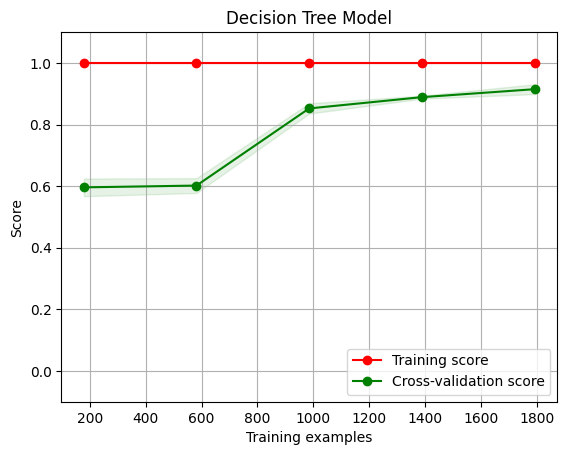

In [16]:
# Learning curve plotting
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
train_sizes, train_scores, test_scores = learning_curve(clf, tr_features, tr_labels, n_jobs=-1, cv=kfold,
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Decision Tree Model")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
line_up = plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
line_down = plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim(-.1, 1.1)
plt.legend(loc="lower right")
plt.show()

In [18]:

import glob
import librosa
import librosa.display
import numpy as np
import pandas as pd
import _pickle as pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


def parse_audio_files(path):
    features, labels = np.empty((0, 193)), np.empty(0)
    labels = []
    for fn in glob.glob(path):
        try:
            mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
        except Exception as e:
            print("Error encountered while parsing file: ", fn)
            continue
        ext_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        features = np.vstack([features, ext_features])
        labels = np.append(labels, fn.split("_")[-1].split(".")[0])

    return np.array(features), np.array(labels)


# Get labels and features of audion file of specified path
ts_features, ts_labels = parse_audio_files('D:/Project_TH_2/Data_set/test/*.wav')

# Convert features and labels to the pandas Series data type
ts_features = np.array(ts_features, dtype=pd.Series)
ts_labels = np.array(ts_labels, dtype=pd.Series)

# Trained Model file name
filename = 'D:/Project_TH_2/Model/Model_Decision_tree/clf_Model_protocol_tree.sav'

# Load saved model from file
model = pickle.load(open(filename, 'rb'))

# Predict the emotion class
prediction = model.predict(ts_features)

# True labels
test_true = ts_labels

# List to store prediction
test_predicted = []

# Iterate over model prediction and store it into list
for i, val in enumerate(prediction):
    test_predicted.append(val)


# Accuracy score of model
print('Accuracy Score of Decision Tree model is:', accuracy_score(test_true, test_predicted))

# Number of corrected prediction
print('Number of correct prediction by using Decision Tree is:', accuracy_score(test_true, test_predicted, normalize=False), 'out of', len(ts_labels))

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=531
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=779
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=596
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=705
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024

Accuracy Score of Decision Tree model is: 0.8517857142857143
Number of correct prediction by using Decision Tree is: 477.0 out of 560


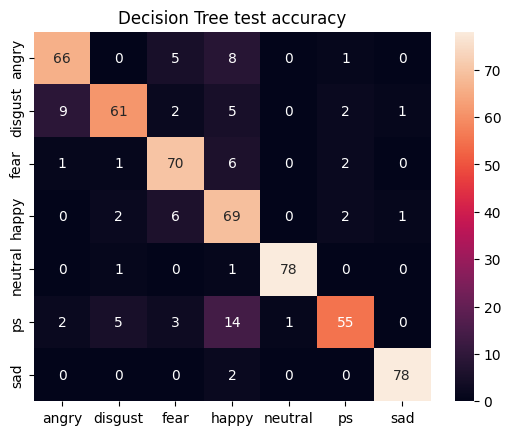

In [19]:
# Plotting confusion matrix
matrix = confusion_matrix(test_true, test_predicted)
classes = list(set(ts_labels))
classes.sort()
df = pd.DataFrame(matrix, columns=classes, index=classes)
plt.figure()
plt.title('Decision Tree test accuracy')
sn.heatmap(df, annot=True)

plt.show()